In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
sns.set(style='ticks', palette='Set2')

# Bayesian in Python

In this tutorial, we are going to go over basic bayesian analysis in python.  

## Review

__Prior p(H):__ Our prior reflects what we know about the value of some parameter before seeing data.  This could refer to previous trials and distributions.

__Likelihood p(D|H)__: what is the plausibility that our data is observed, given our prior?

__Posterior p(H|D):__ This is result of the Bayesian analysis and reflects all that we know about a problem (given our data and model).

__Evidence p(D):__ Evidence is the probability of observing the data averaged over all the possible values the parameters can take. Also knowns as the noramlziing factor. The normalising constant makes sure that the resulting posterior distribution is a true probability distribution by ensuring that the sum of the distribution is equal to 1.

Because p(D) is considered a normalizing constant we can say: $p(H|D) \propto p(D|H) * p(H)$

## Coin - Flipping Problem

Let's think of these terms in the context of a coin-flipping experiment.

On a standard coin, we have two sides, heads or tails.  Both of which are equally likely to show after a coin flip, or a 50% probability.

In the case of a coin-flipping trials, we may want to consider this probability our prior.

Let's go ahead and create our prior distribution:

In [2]:
coin_flips_prior = np.random.binomial(n = 1, p = 0.5, size = 1000)
coin_flips_prior[:5]

array([1, 0, 1, 0, 0])

In [3]:
params = np.linspace(0,1,100)
params

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [4]:
p_prior = np.array([np.product(st.bernoulli.pmf(coin_flips_prior, p)) for p in params])

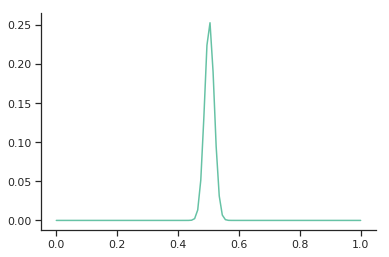

In [6]:
p_prior = p_prior/np.sum(p_prior)  #Probability distribution from 0-1
plt.plot(params, p_prior)
sns.despine()

As you can see, our prior distribution peaks at 0.5 which is what our probability for our fair coin is.

Now, let's introduce some observations from trials with an unfair coin.  Let's say the probability is now weight 80-20, where the probability a head is shown is 0.8.

Let's create this sampling distribution:

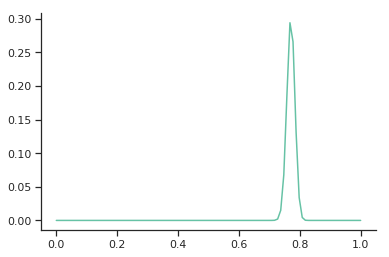

In [7]:
coin_flips_observed = np.random.binomial(n=1, p=0.8, size = 1000)
p_observed = np.array([np.product(st.bernoulli.pmf(coin_flips_observed, p)) for p in params])
p_observed = p_observed/np.sum(p_observed)
plt.plot(params, p_observed)
sns.despine()

The peak for our sampling distribution is around 0.8.

While our observations from our sampling distribution indicate a probability around 0.8, because our prior is 0.5, we have to assess the likelihood that these values could be observed and find our posterior distribution.

Remember, $p(H|D) \propto p(D|H) * p(H)\ OR\ Posterior\ \propto Likelihood\ *  Prior$

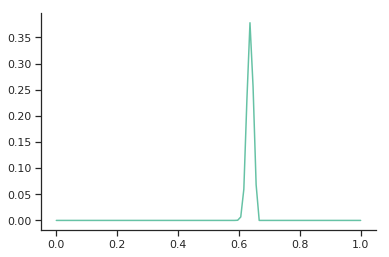

In [8]:
p_posterior = [p_prior[i] * p_observed[i] for i in range(len(p_prior))]
p_posterior = p_posterior/np.sum(p_posterior)
plt.plot(params, p_posterior)
sns.despine()

## University of Michigan Student IQs

We'll do another example where we have some prior belief about the IQ of University of Michigan students.

For our prior distribution, we'll have a normal distribution with a mean IQ of 100 and a standard deviation of 10.

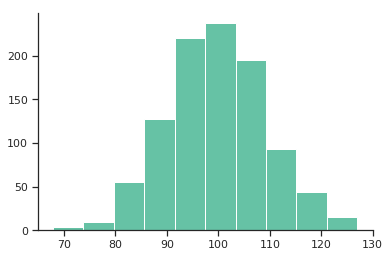

In [11]:
prior_distribution = np.random.normal(100, 10, 1000)
plt.hist(prior_distribution)
sns.despine()

Now, let's say we are collecting some observations of student IQs which takes the shape of a normal distribution with mean 115 and standard deviation of 7.5 and want to construct our posterior distribution.

In order to do this, we update our prior by calculating the mean and variance after each observation.

The equations for our updated prior mean and variance are:

$$Updated\ Prior\ Mean = \frac{\sigma^2\mu_{observed} + \sigma_{prior}^2x}{\sigma_{observed}^2 + \sigma_{prior}^2}$$

$$Updated\ Prior\ Variance = \frac{\sigma_{observed}^2\sigma_{prior}^2}{\sigma_{observed}^2 + \sigma_{prior}^2}$$

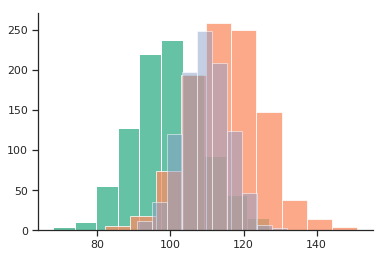

In [12]:
np.random.seed(5)
observed_distribution = np.random.normal(115, 10, 1000)
mu = [100] * 1000
sigma = [10] * 1000

mu[0] = (10**2*observed_distribution[0] + (10**2)*100)/(10**2+10**2)
sigma[0] = (10**2*10**2)/(10**2+10**2)

for i in range(1000):
    if i == 999:
        break
    mu[i + 1] = (sigma[i]**2*observed_distribution[i+1] + (10**2)*mu[i] )/(sigma[i]**2+10**2)
    sigma[i + 1] = (sigma[i]*10**2)/(sigma[i]+10**2)
    

posterior_distributions = [[]] * 20
    
for i in range(20):
    posterior_distributions[i] = np.random.normal(mu[i], sigma[i], 1000)
    
plt.hist(prior_distribution)
plt.hist(observed_distribution, alpha = 0.75)
plt.hist(posterior_distributions[14], alpha = 0.5)
sns.despine()